Importing the required libraries

In [1]:
#---- Wall Breakers----#
# Sunny Kaushik-- IMT2021007---#
# Shrey Salaria-- IMT2021087---#
# Akash Perla-- IMT2021530---#

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.svm import SVC

In [3]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
train_df["Journey_Time"] = train_df["Journey_Time"].apply(lambda x: max(min(x, 80), 12))

In [4]:
train_df.head()

,Index,Bus_ID,DepartureTime,Journey_Time,Bus_Operator,Departure_Bus_Stop,Arrival_Bus_Stop,Day,Target
0,448131,377,788,34.2,ZL,UVZ,HZU,Thursday,0
1,240679,4225,1135,24.0,PB,FYJ,EGO,Wednesday,1
2,519288,6390,735,17.0,LL,VQD,VIR,Sunday,1
3,209857,2254,820,NaN,TK,ODV,EXU,Monday,1
4,34627,6322,855,15.8,LL,VIR,DFY,Monday,1


In [5]:
train_df.describe()

,Index,Bus_ID,DepartureTime,Journey_Time,Target
count,431505.000000,431505.000000,431505.000000,362427.000000,431505.000000
mean,269792.569938,2427.169488,802.880140,26.550781,0.445429
std,155704.949520,2066.054794,278.073689,13.704502,0.497014
min,0.000000,1.000000,10.000000,12.000000,0.000000
25%,134938.000000,712.000000,565.000000,16.200000,0.000000
50%,269934.000000,1809.000000,795.000000,23.000000,0.000000
75%,404581.000000,3742.000000,1035.000000,32.400000,1.000000
max,539381.000000,7814.000000,1439.000000,80.000000,1.000000


In [6]:
train_df.drop_duplicates(inplace=True)

In [7]:
train_df.isna().sum()

Index                     0
Bus_ID                    0
DepartureTime             0
Journey_Time          69078
Bus_Operator              0
Departure_Bus_Stop        0
Arrival_Bus_Stop          0
Day                    1258
Target                    0
dtype: int64

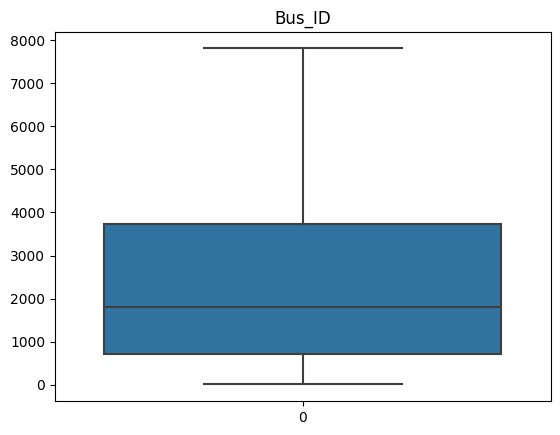

<Figure size 1000x1000 with 0 Axes>

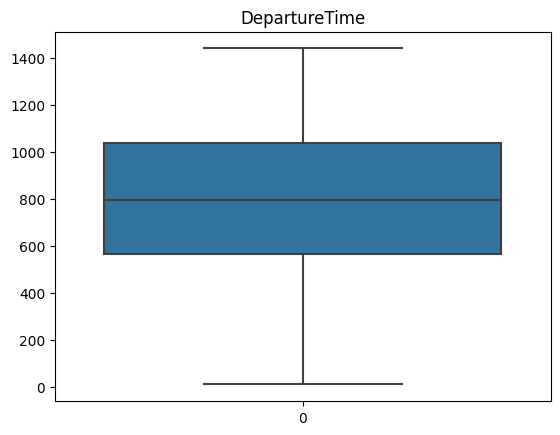

<Figure size 1000x1000 with 0 Axes>

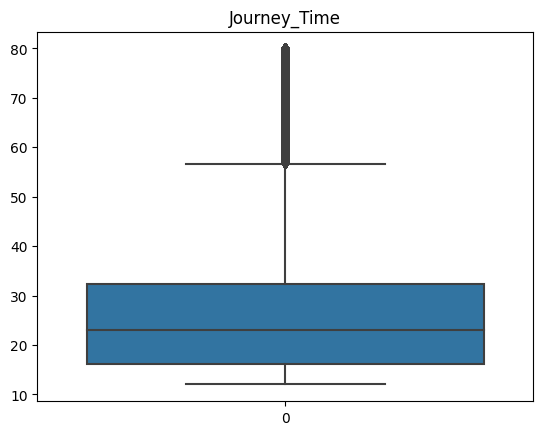

<Figure size 1000x1000 with 0 Axes>

In [8]:
# for label in train_df.columns[1:]:
#   plt.scatter(train_df[label], train_df["Index"])
#   plt.title(label)
#   plt.ylabel("Id")
#   plt.xlabel(label)
#   plt.show()
#train_df=train_df.dropna()
# feature_to_drop_na = 'Day'  # Change this to the name of the feature you want to clean

# train_df = train_df.dropna(subset=['Day'])

features=["Bus_ID","DepartureTime","Journey_Time"]
for i in range(len(features)):
  sns.boxplot(train_df[features[i]])
  plt.title(features[i])
  plt.figure(figsize=(10, 10))
  plt.show()

In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# train_df.fillna(train_df.mode().iloc[0], inplace=True)
# test_df.fillna(test_df.mode().iloc[0], inplace=True)
# train_df.fillna(-999, inplace=True)
# test_df.fillna(-999, inplace=True)
# train_df['categorical_column'].fillna(train_df['categorical_column'].mode().iloc[0], inplace=True)
# test_df['categorical_column'].fillna(test_df['categorical_column'].mode().iloc[0], inplace=True)
# train_df.interpolate(method='linear', inplace=True)
# test_df.interpolate(method='linear', inplace=True)
# categorical_columns = ['Bus_Operator', 'Departure_Bus_Stop','Arrival_Bus_Stop']  # Replace with actual column names
# # Replace missing values in categorical columns based on probabilities
# for col in categorical_columns:
#     prob = train_df[col].value_counts() / len(train_df[col])
#     train_df[col].fillna(pd.Series(np.random.choice(prob.index, p=prob.values, size=len(train_df))), inplace=True)
#     test_df[col].fillna(pd.Series(np.random.choice(prob.index, p=prob.values, size=len(test_df))), inplace=True)




In [10]:
# Example 2: Creating a new feature 'Is_Weekend'


<ipython-input-11-6beb9dc58d95>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), cmap="YlGnBu", annot=True)


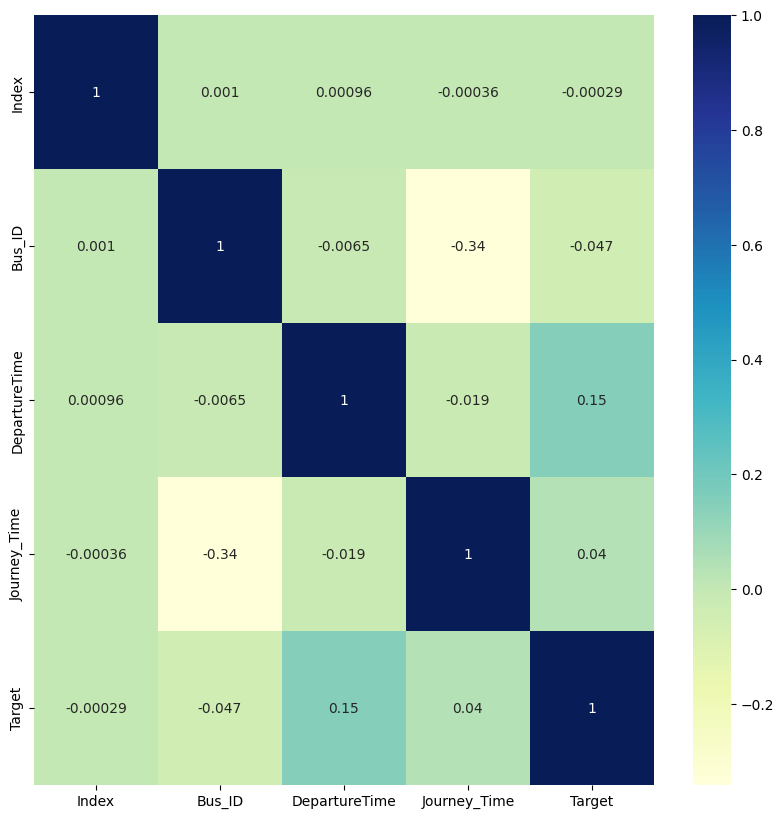

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(train_df.corr(), cmap="YlGnBu", annot=True)
plt.savefig("corellation.png")

In [12]:
train_df

,Index,Bus_ID,DepartureTime,Journey_Time,Bus_Operator,Departure_Bus_Stop,Arrival_Bus_Stop,Day,Target
0,448131,377,788,34.2,ZL,UVZ,HZU,Thursday,0
1,240679,4225,1135,24.0,PB,FYJ,EGO,Wednesday,1
2,519288,6390,735,17.0,LL,VQD,VIR,Sunday,1
3,209857,2254,820,NaN,TK,ODV,EXU,Monday,1
4,34627,6322,855,15.8,LL,VIR,DFY,Monday,1
...,...,...,...,...,...,...,...,...,...
431500,463164,483,360,NaN,RP,GHQ,SKA,Monday,0
431501,341459,546,1008,12.0,EX,KQO,RJJ,Tuesday,0
431502,380981,1156,480,22.8,AI,PGZ,DWO,Saturday,0
431503,159563,1002,480,12.0,VS,RJJ,KQO,Friday,0


In [13]:
X=train_df.iloc[:,1:8]
Y=train_df.iloc[:,-1]
#X = X.drop('Day', axis=1)
#X = X.drop('Journey_Time', axis=1)
#X = X.drop('Bus_ID', axis=1)
#X = X.drop('Arrival_Bus_Stop', axis=1)
# X['Is_Weekend'] = (X['Day'].isin(['Saturday', 'Sunday'])).astype(int)
X



,Bus_ID,DepartureTime,Journey_Time,Bus_Operator,Departure_Bus_Stop,Arrival_Bus_Stop,Day
0,377,788,34.2,ZL,UVZ,HZU,Thursday
1,4225,1135,24.0,PB,FYJ,EGO,Wednesday
2,6390,735,17.0,LL,VQD,VIR,Sunday
3,2254,820,NaN,TK,ODV,EXU,Monday
4,6322,855,15.8,LL,VIR,DFY,Monday
...,...,...,...,...,...,...,...
431500,483,360,NaN,RP,GHQ,SKA,Monday
431501,546,1008,12.0,EX,KQO,RJJ,Tuesday
431502,1156,480,22.8,AI,PGZ,DWO,Saturday
431503,1002,480,12.0,VS,RJJ,KQO,Friday


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.99, random_state=32)

In [15]:
X_test_df=test_df.iloc[:,1:8]
#X_test_df = X_test_df.drop('Day', axis=1)
#X_test_df = X_test_df.drop('Bus_ID', axis=1)
# X_test_df = X_test_df.drop('Bus_Operator', axis=1)
#X_test_df = X_test_df.drop('Journey_Time', axis=1)
# X_test_df = X_test_df.drop(, axis=1)
#scaler = StandardScaler()
# X_test_df['Is_Weekend'] = (X_test_df['Day'].isin(['Saturday', 'Sunday'])).astype(int)
# X_test_df = scaler.fit_transform(X_test_df)

In [16]:
!pip install category-encoders

import category_encoders as ce
encoder = ce.TargetEncoder(cols=['Bus_ID','Bus_Operator', 'Departure_Bus_Stop','Arrival_Bus_Stop','Day'])
X_train = encoder.fit_transform(X_train, Y_train)
X_test = encoder.transform(X_test)
X_test_df=encoder.transform(X_test_df)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.6 MB/s eta 0:00:00


In [17]:
# # Create an IterativeImputer instance
imputer = IterativeImputer(max_iter=10000, random_state=32)

# Fit the imputer on the dataset and transform the data
X_train = imputer.fit_transform(X_train)
X_test_df = imputer.fit_transform(X_test_df)


In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test_df = scaler.fit_transform(X_test_df)


In [19]:
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# model = tuner.hypermodel.build(best_hps)
# history = model.fit(X_train, Y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

In [20]:
#Build the neural network model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

input_shape = X_train.shape[1:]

model = keras.Sequential([
    layers.Flatten(input_shape=input_shape),

    #64,128,64,32,16,1
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    #layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    #layers.Dropout(0.5),
    layers.Dense(16, activation='relu'),
    #layers.Dense(32, activation='relu'),

    layers.Dense(1, activation='sigmoid')
])
custom_optimizer = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=custom_optimizer,  # Use the custom optimizer with the desired learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=50, batch_size=64, validation_data=(X_test, Y_test))

Epoch 1/50
6675/6675 [==============================] - 43s 6ms/step - loss: 0.6195 - accuracy: 0.6573 - val_loss: nan - val_accuracy: 0.5544
Epoch 2/50
6675/6675 [==============================] - 28s 4ms/step - loss: 0.6177 - accuracy: 0.6590 - val_loss: nan - val_accuracy: 0.5544
Epoch 3/50
6675/6675 [==============================] - 29s 4ms/step - loss: 0.6167 - accuracy: 0.6595 - val_loss: nan - val_accuracy: 0.5544
Epoch 4/50
6675/6675 [==============================] - 29s 4ms/step - loss: 0.6160 - accuracy: 0.6602 - val_loss: nan - val_accuracy: 0.5544
Epoch 5/50
6675/6675 [==============================] - 27s 4ms/step - loss: 0.6155 - accuracy: 0.6605 - val_loss: nan - val_accuracy: 0.5544
Epoch 6/50
6675/6675 [==============================] - 27s 4ms/step - loss: 0.6151 - accuracy: 0.6617 - val_loss: nan - val_accuracy: 0.5544
Epoch 7/50
6675/6675 [==============================] - 27s 4ms/step - loss: 0.6147 - accuracy: 0.6618 - val_loss: nan - val_accuracy: 0.5544
Epoch 

In [21]:
# import tensorflow as tf
# from tensorflow.keras.layers import Layer
# class PReLU(Layer):
#     def __init__(self, alpha_initializer='zeros', **kwargs):
#         super(PReLU, self).__init__(**kwargs)
#         self.alpha_initializer = tf.keras.initializers.get(alpha_initializer)

#     def build(self, input_shape):
#         self.alpha = self.add_weight(
#             name='alpha',
#             shape=(1, 1, input_shape[-1]),
#             initializer=self.alpha_initializer,
#             dtype=self.dtype,
#             trainable=True
#         )
#         super(PReLU, self).build(input_shape)

#     def call(self, inputs):
#         pos = tf.nn.relu(inputs)
#         neg = self.alpha * (inputs - tf.abs(inputs)) * 0.5
#         return pos + neg

#     def compute_output_shape(self, input_shape):
#         return input_shape
# input_shape = X_train.shape[1:]

# model = tf.keras.Sequential([
#     layers.Flatten(input_shape=input_shape),

#     # 64, 128, 64, 32, 16, 1
#     layers.Dense(64, activation=PReLU()),
#     layers.Dense(128, activation=PReLU()),
#     layers.Dense(64, activation=PReLU()),
#     layers.Dense(32, activation=PReLU()),
#     layers.Dense(16, activation=PReLU()),
#     layers.Dense(1, activation='sigmoid')
# ])

# custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# model.compile(optimizer=custom_optimizer,
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# # Define early stopping callback
# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss',
#     patience=5,
#     restore_best_weights=True
# )

# model.fit(X_train, Y_train, epochs=50, batch_size=64, validation_data=(X_test, Y_test), callbacks=[early_stopping])

In [22]:
# import xgboost as xgb
# model = xgb.XGBClassifier(
#     n_estimators=280,
#     max_depth=9,
#     learning_rate=0.1,
#     min_child_weight=1,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     gamma=0,
#     reg_alpha=0.01,
#     reg_lambda=1,
#     objective='binary:logistic',
# )
# model.fit(X_train, Y_train)
# y_pred = model.predict(X_test)
# print(accuracy_score(Y_test,y_pred))
# print(f1_score(Y_test,y_pred))


In [23]:
label=test_df.iloc[:,0]
y_pred_test = model.predict(X_test_df)
print(y_pred_test.shape)
#y_pred_test = y_pred_test.reshape(len(y_pred_test),1)
y_pred_test=np.array(y_pred_test)
print(y_pred_test)


threshold = 0.5
y_pred_test = [(1 if pred >= threshold else 0) for pred in y_pred_test]
label = label.values.reshape(-1,1)

result = np.column_stack((label, y_pred_test))
# result = np.concatenate((label, y_pred_test.reshape(-1, 1)), axis=1)
# label=np.array(label)
# result=np.concatenate((label,y_pred_test),axis=1)
result_df=pd.DataFrame(result,columns=['Index','Target'])
result_df.to_csv('rf3.csv',index=False)

3372/3372 [==============================] - 6s 2ms/step
(107877, 1)
[[0.42694402]
 [0.6032892 ]
 [0.13562982]
 ...
 [0.5990577 ]
 [0.22793643]
 [0.19177966]]
